In [ ]:
%%capture
%pip install transformers datasets torch pytorch-lightning -q

In [ ]:
train_path = 'ucc_datasets/train.csv'
test_path = 'ucc_datasets/test.csv'

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [ ]:
train_df

In [ ]:
test_df

In [ ]:
train_df.columns

In [19]:
attributes = [
    'antagonize', 'condescending', 'dismissive', 'generalisation',
    'generalisation_unfair', 'hostile', 'sarcastic', 'healthy'
]

<Axes: >

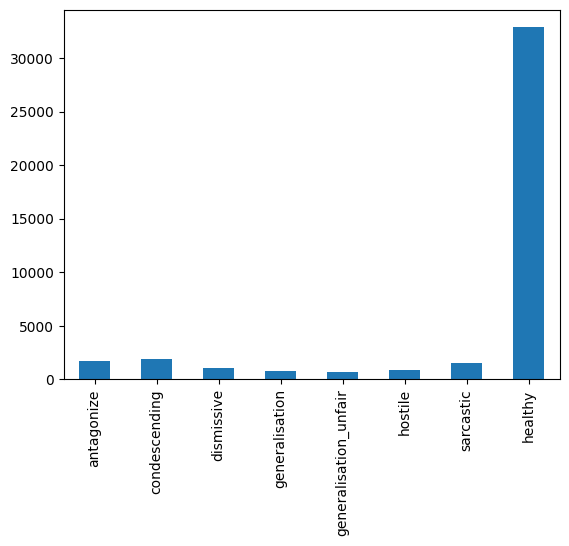

In [20]:
train_df[attributes].sum().plot.bar()

In [21]:
train_df['unhealthy'] = np.where(train_df['healthy'] == 1, 0, 1)

<Axes: >

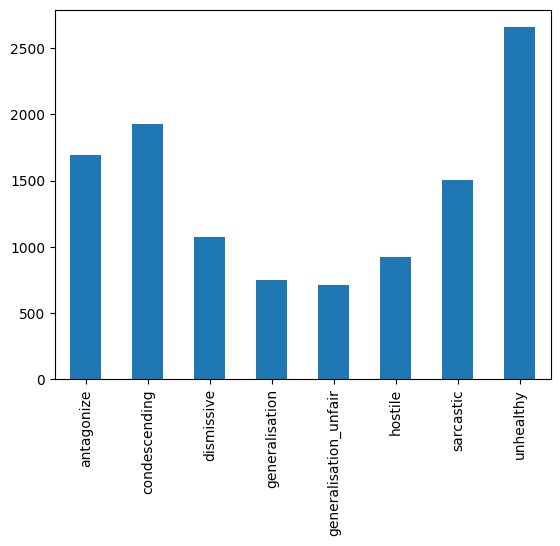

In [18]:

attributes = [
    'antagonize', 'condescending', 'dismissive', 'generalisation',
    'generalisation_unfair', 'hostile', 'sarcastic', 'unhealthy'
]

train_df[attributes].sum().plot.bar()
